# Week No.8 : The Developers Arena Internship

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
path = r"../dfsets/house_prices.csv"

In [3]:
df = pd.read_csv(path)

In [5]:
print(df)

    Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0      PROP0001  3712         4          3   36        Rural         House   
1      PROP0002  1591         4          1   35       Suburb         House   
2      PROP0003  1646         4          3   20        Rural         Villa   
3      PROP0004  4814         1          2   13  City Center         Villa   
4      PROP0005   800         4          2   38       Suburb     Apartment   
..          ...   ...       ...        ...  ...          ...           ...   
295    PROP0296  1450         4          1    0       Suburb         Villa   
296    PROP0297  3866         1          2   16  City Center     Apartment   
297    PROP0298  1970         3          1    6        Rural     Apartment   
298    PROP0299  4243         3          2    7        Rural         Villa   
299    PROP0300  2013         1          2   19       Suburb     Apartment   

        Price  
0    22260000  
1    16057500  
2    12730000  

In [7]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [8]:
df.tail()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
295,PROP0296,1450,4,1,0,Suburb,Villa,17625000
296,PROP0297,3866,1,2,16,City Center,Apartment,41060000
297,PROP0298,1970,3,1,6,Rural,Apartment,13050000
298,PROP0299,4243,3,2,7,Rural,Villa,24865000
299,PROP0300,2013,1,2,19,Suburb,Apartment,16672500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


In [10]:
df.columns

Index(['Property_ID', 'Area', 'Bedrooms', 'Bathrooms', 'Age', 'Location',
       'Property_Type', 'Price'],
      dtype='object')

## df Cleaning and Preprocessing

In [13]:
# Check for missing values
df.isnull().sum()

Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Convert categorical variables to numeric (one-hot encoding)
df = pd.get_dummies(df, columns=['Location', 'Property_Type'], drop_first=True)

In [16]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Price,Location_Rural,Location_Suburb,Property_Type_House,Property_Type_Villa
0,PROP0001,3712,4,3,36,22260000,True,False,True,False
1,PROP0002,1591,4,1,35,16057500,False,True,True,False
2,PROP0003,1646,4,3,20,12730000,True,False,False,True
3,PROP0004,4814,1,2,13,50840000,False,False,False,True
4,PROP0005,800,4,2,38,10650000,False,True,False,False


In [23]:
# Check df types and convert if necessary
df['Age'] = df['Age'].astype(int)

## Exploratory Data Analysis (EDA)

In [25]:
# Descriptive statistics
df.describe()


,Area,Bedrooms,Bathrooms,Age,Price
count,300.00000,300.000000,300.000000,300.000000,3.000000e+02
mean,2759.70000,3.033333,2.026667,25.000000,2.488366e+07
std,1297.68143,1.467219,0.792495,14.332646,1.266525e+07
min,520.00000,1.000000,1.000000,0.000000,3.695000e+06
25%,1675.75000,2.000000,1.000000,12.000000,1.527750e+07
50%,2738.00000,3.000000,2.000000,25.500000,2.236500e+07
75%,3801.25000,4.000000,3.000000,36.250000,3.460812e+07
max,4999.00000,5.000000,3.000000,49.000000,5.870000e+07


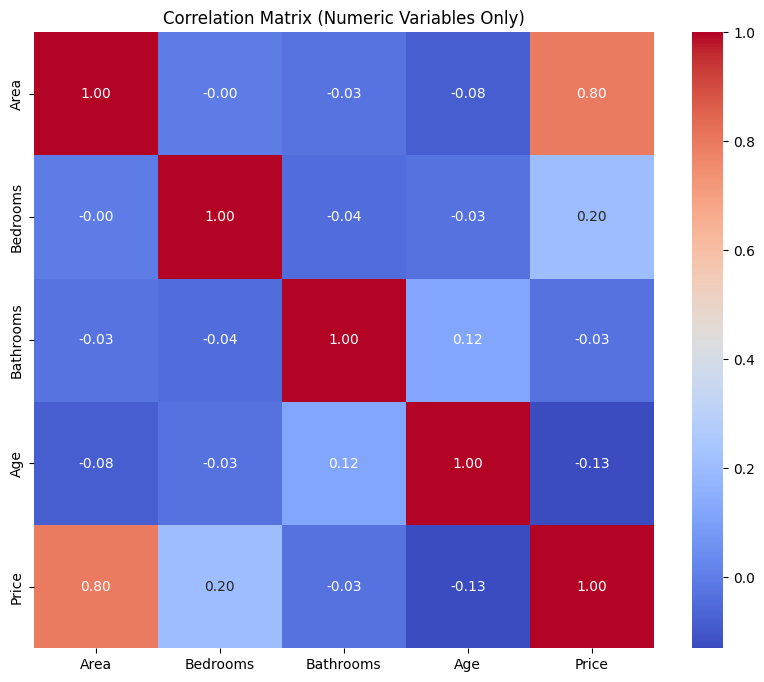

In [27]:
# Select only numeric columns
numeric_data =df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix for numeric variables only
corr_matrix = numeric_data.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()


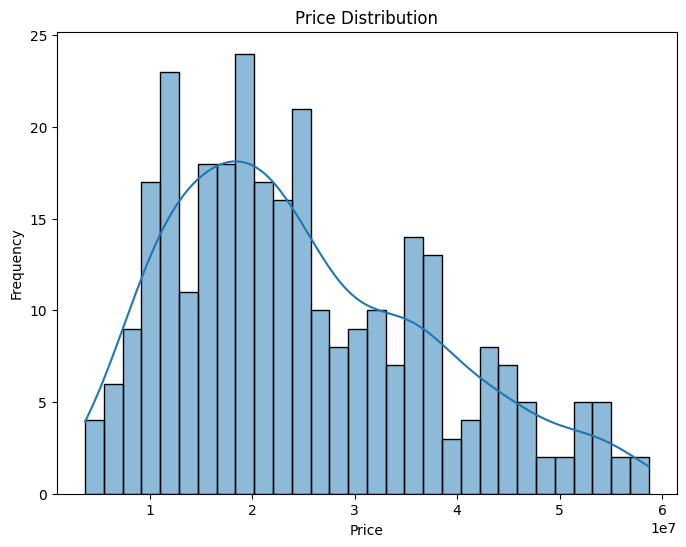

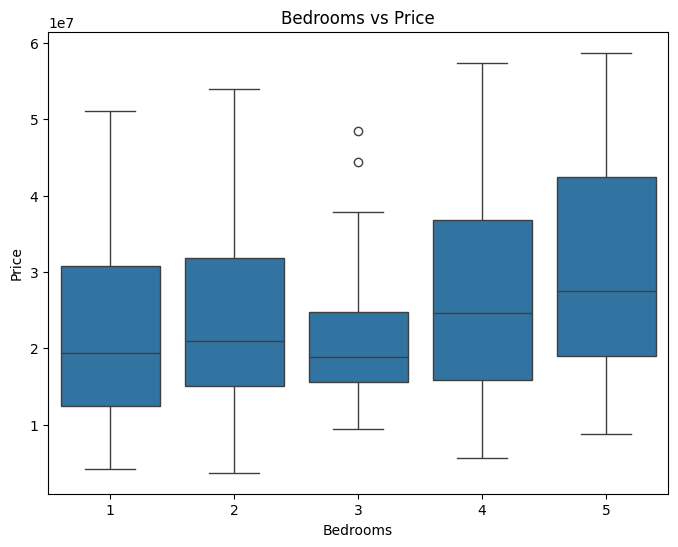

In [28]:
# Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Bedrooms vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')
plt.show()


## Statistical Modeling (Regression Analysis)

In [34]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Price', 'Property_ID', 'Location', 'Property_Type'], errors='ignore')
y = df['Price']




In [35]:

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the linear regression model
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
# Predict the prices on the test set
y_pred = model.predict(X_test)


In [40]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 2188736.343703811
Mean Squared Error: 8454330868276.587
Root Mean Squared Error: 2907633.207314256


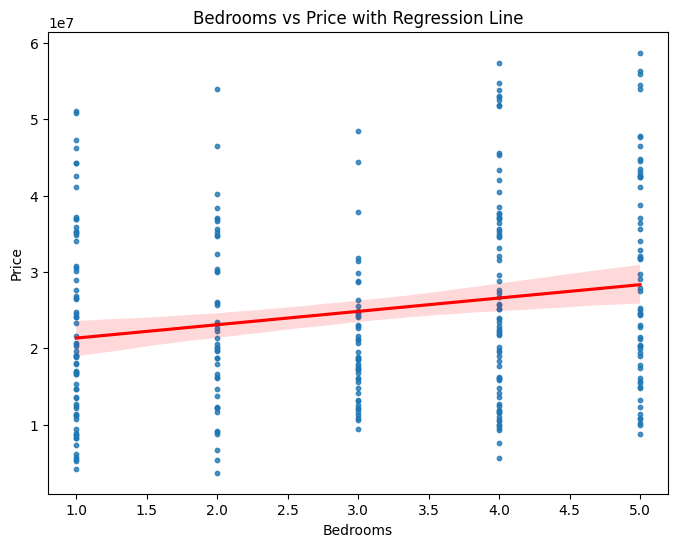

In [45]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Bedrooms', y='Price', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Bedrooms vs Price with Regression Line')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
